<a href="https://colab.research.google.com/github/ed-chin-git/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/U2S1D2_ASSIGNMENT_Intermediate_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference Materials
Ryan Allred's lecture [here](https://www.youtube.com/watch?v=NbMHOw3GxwI&list=PL2SsOkMTK8FCT6WJdo7DbVXjOWXCn9dg0&index=55&t=3391s)

3Blue1Brown [video](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

Docs for Python [Statistics](https://docs.python.org/3/library/statistics.html#module-statistics) Package


# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [37]:
import numpy as np
import statistics as stats
import pandas as pd
import matplotlib.pyplot as plt

def my_mean(items):
  return sum(items) / len(items)

def my_sqrt(x):
  return x**(.5)

def my_POPvariance(items):
  return sum( ((my_mean(items) - item) ** 2) for item in items) / len(items)

def my_SAMvariance(items):
  return sum( ((my_mean(items) - item) ** 2) for item in items) / (len(items)-1)

def my_POPstdev(items):
  return (my_POPvariance(items)**0.5)

def my_SAMstdev(items):
  return (my_SAMvariance(items)**0.5)


sales=[3505,2400, 3027, 2798, 3700, 3250, 2689]

print('stats.mean =',stats.mean(sales))
print('my_mean =',my_mean(sales))

print('\nstats.pvariance =',stats.pvariance(sales))
print('my_POPvariance =',my_POPvariance(sales))

print('\nstats.pstdev =',stats.pstdev(sales))
print('my_POPstdev =',my_POPstdev(sales))

print('\nstats.variance =',stats.variance(sales))
print('my_SAMvariance =',my_SAMvariance(sales))

print('\nstats.stdev =',stats.stdev(sales))
print('my_SAMstdev =',my_SAMstdev(sales))


stats.mean = 3052.714285714286
my_mean = 3052.714285714286

stats.pvariance = 183761.0612244898
my_POPvariance = 183761.06122448976

stats.pstdev = 428.67360686714756
my_POPstdev = 428.67360686714756

stats.variance = 214387.90476190476
my_SAMvariance = 214387.90476190473

stats.stdev = 463.02041505953576
my_SAMstdev = 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [56]:

# When a and b are 1-dimensional sequences, numpy.cov(a,b)[0][1]
# is equivalent to your cov(a,b)

visits=[127,80,105,92,120,115,93]
print('Covariance =',np.cov(sales,visits)[0][1] )

Covariance = 7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [58]:
def my_SAMPmean(values):
  """Compute the mean of data"""
  tot=0
  for value in values:
    tot += value
  return tot/len(values)

def my_SAMPvar(values):
  mean = my_SAMPmean(values)
  tot = 0
  for value in values:
    tot += ((value - mean) ** 2)
  return tot/(len(values)-1)

def my_SAMPstdev(values):
  return my_SAMPvar(values) ** 0.5

sd_sales = my_SAMPstdev(sales)
sd_visits = my_SAMPstdev(visits)

factor = np.array([[sd_sales **2, sd_sales * sd_visits],
                   [sd_sales * sd_visits, sd_visits ** 2]])

cr_cf = np.divide(np.cov(sales,visits), factor)

print("\nMY.corrcoef=")
print(cr_cf[0][1])

print("\nnp.corrcoef=")
print(np.corrcoef(sales, visits)[0][1])


MY.corrcoef=
0.9628339778148909

np.corrcoef=
0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

###Documentation
DataFrame.[corr](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html#pandas.DataFrame.corr)

DataFrame.[cov](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.cov.html#pandas.DataFrame.cov)

In [40]:
data_url=('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df=pd.read_csv(data_url)
print('Summary Stats')
df.describe()


Summary Stats


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [41]:
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [42]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [43]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal? Perpendicular!

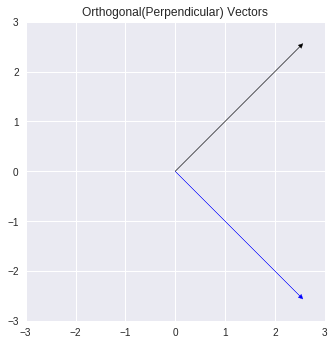

In [65]:
v_1 = [2.5, -2.5]
v_2 = [2.5, 2.5]
# Fix Axes
plt.axes().set_aspect('equal')
# Plot the Scaled Vectors
plt.arrow(0,0, v_1[0], v_1[1],head_width=.09, head_length=0.09, color ='blue')
plt.arrow(0,0, v_2[0], v_2[1],head_width=.09, head_length=0.09, color ='black')
plt.xlim(-3,3)          
plt.ylim(-3,3)
plt.title("Orthogonal(Perpendicular) Vectors")
plt.show()

In [45]:
dot_product=np.dot(v_1,v_2)
if dot_product==0.0:
  print('ORTHOGONAL ')
else:
  print('NOT ORTHOGONAL ') 

print('Dot Product = ',dot_product)

ORTHOGONAL 
Dot Product =  0.0


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [46]:
a=[-5, 3, 7,]
b=[6, -8, 2]
dot_product2=np.dot(a,b)
if dot_product2==0.0:
  print('ORTHOGONAL ')
else:
  print('NOT ORTHOGONAL ') 
print('Dot Product = ',dot_product2)



NOT ORTHOGONAL 
Dot Product =  -40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [55]:
c=[2,-15,6,20]

print('||c||**2 =',np.linalg.norm(c)**2)
print('c . c =', np.dot(c,c))
print('cTc =', np.matmul(np.transpose(c),c))

||c||**2 = 665.0
c . c = 665
cTc = 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\-8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0\\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1\\0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0\\1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [48]:
f=[4,12,11,9,2]
print('F =',f)
print('F hat=',  (f/np.linalg.norm(f)) )

F = [4, 12, 11, 9, 2]
F hat= [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

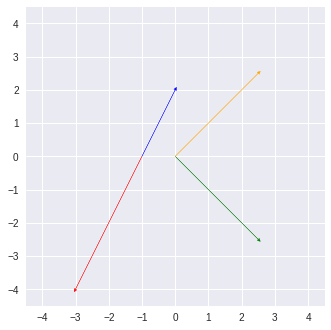

In [94]:
dep_1 = [1,2]
dep_2 = [-2,-4]
ind_1 = [2.5, -2.5]
ind_2 = [2.5, 2.5]
# Fix Axes
plt.axes().set_aspect('equal')
# Plot the Scaled Vectors
plt.arrow(-1,0, dep_1[0], dep_1[1],head_width=.09, head_length=0.09, color ='blue')
plt.arrow(-1,0, dep_2[0], dep_2[1],head_width=.09, head_length=0.09, color ='red')
plt.arrow(0,0, v_3[0], v_3[1],head_width=.09, head_length=0.09, color ='green')
plt.arrow(0,0, v_4[0], v_4[1],head_width=.09, head_length=0.09, color ='orange')

plt.xlim(-4.5,4.5)          
plt.ylim(-4.5,4.5)
plt.title("")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

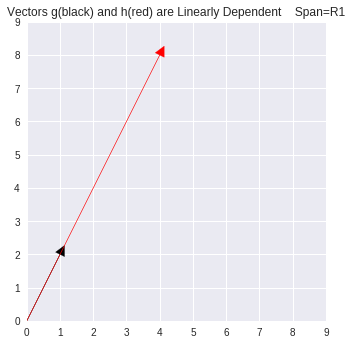

In [100]:
v_1 = [1,2]
v_2 = [4,8]
# Fix Axes
plt.axes().set_aspect('equal')
# Plot the Scaled Vectors
plt.arrow(0,0, v_1[0], v_1[1],head_width=.3, head_length=0.3, color ='black')
plt.arrow(0,0, v_2[0], v_2[1],head_width=.3, head_length=0.3, color ='red')
plt.xlim(0,9)          
plt.ylim(0,9)
plt.title("Vectors g(black) and h(red) are Linearly Dependent    Span=R1")
plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

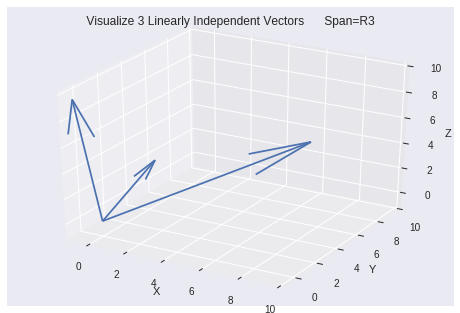

In [103]:
from mpl_toolkits.mplot3d import Axes3D

l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]

vectors = np.array([[0, 0, 0, 1, 2, 3], 
                    [0, 0, 0, -1, 0, 7],
                    [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1.3)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
ax.set_zlim([-1, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title(" Visualize 3 Linearly Independent Vectors      Span=R3 ")
plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



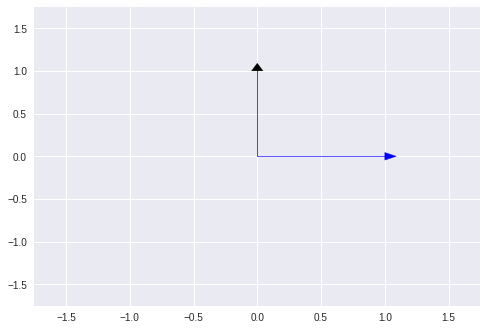

In [64]:
plt.arrow(0,0,1,0, head_width=0.09, head_length=.09, color='blue')
plt.arrow(0,0,0,1, head_width=0.09, head_length=.09, color='black')

plt.xlim(-1.75, 1.75)
plt.ylim(-1.75, 1.75)
plt.show()

## 6.2 What does it mean to form a basis?

Set of vectors  with unit length = 1 that are linearly independent

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [59]:
P = [[1, 2, 3],
     [-1, 0, 7],
     [4, 8, 2]]
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

Rank is the number of dimensions of the vector space generated by the columns of a matrix

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [106]:
v = np.array([1, 3])
w = np.array([-1, 2])

projLw = np.dot(w,v)*v / np.dot(v,v)
projLw

array([0.5, 1.5])

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

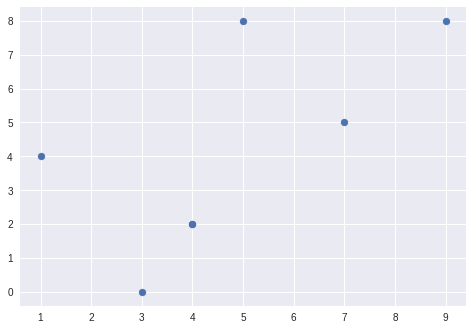

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()